In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

Milk Data

In [3]:
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
std = StandardScaler()
milk_scl = std.fit_transform(milk)

links = ['ward', 'single', 'complete', 'average']
scores = []
num_clusters = np.arange(2, 8)

In [4]:
for l in links:
    for n in num_clusters:
        cluster = AgglomerativeClustering(n_clusters=n, linkage=l)
        cluster.fit(milk_scl)
        scores.append([l,n,silhouette_score(milk_scl, cluster.labels_)])

scores = pd.DataFrame(scores, columns=['Link type', 'Number of cluster', 'score'])
scores.sort_values(by='score', ascending=False)

,Link type,Number of cluster,score
1,ward,3,0.539160
0,ward,2,0.525851
6,single,2,0.518685
18,average,2,0.518685
13,complete,3,0.487576
19,average,3,0.487576
12,complete,2,0.455789
2,ward,4,0.443481
16,complete,6,0.419614
20,average,4,0.416015


Nutrient Data

In [7]:
nutrients = pd.read_csv('../Datasets/nutrient.csv', index_col=0)

In [11]:
scaler = StandardScaler().set_output(transform='pandas')
nutrients_scl = scaler.fit_transform(nutrients)

links = ['ward', 'single', 'complete', 'average']
scores = []
num_clusters = np.arange(2, 8)

In [12]:
for l in links:
    for n in num_clusters:
        cluster = AgglomerativeClustering(n_clusters=n, linkage=l)
        cluster.fit(nutrients_scl)
        scores.append([l,n,silhouette_score(nutrients_scl, cluster.labels_)])

scores = pd.DataFrame(scores, columns=['Link type', 'Number of cluster', 'score'])
scores.sort_values(by='score', ascending=False)

,Link type,Number of cluster,score
6,single,2,0.448342
7,single,3,0.445319
19,average,3,0.445319
2,ward,4,0.415801
14,complete,4,0.415801
18,average,2,0.413451
13,complete,3,0.403730
1,ward,3,0.403730
15,complete,5,0.400003
21,average,5,0.400003


In [17]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster.fit(nutrients_scl)
nutrients_copy = nutrients.copy()

nutrients_copy['label'] = cluster.labels_
nutrients_copy.sort_values('label')

,energy,protein,fat,calcium,iron,label
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,0
HAMBURGER,245,21,17,9,2.7,0
BEEF ROAST,420,15,39,7,2.0,0
BEEF STEAK,375,19,32,9,2.6,0
BEEF CANNED,180,22,10,17,3.7,0
CHICKEN BROILED,115,20,3,8,1.4,0
CHICKEN CANNED,170,25,7,12,1.5,0
BEEF HEART,160,26,5,14,5.9,0
LAMB LEG ROAST,265,20,20,9,2.6,0


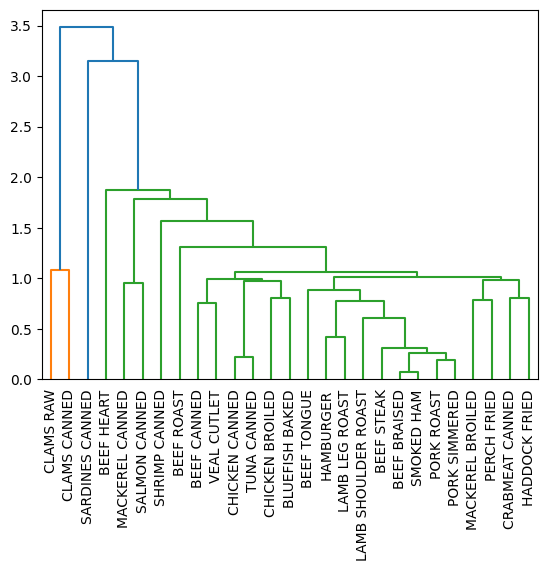

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(nutrients_scl, method='single')
dendrogram(mergings, labels=nutrients_scl.index,)
plt.xticks(rotation=90)
plt.show()